The aim of this Notebook is to compute numerically premium of contracts and risk measures of contracts in the Cramér-Lundberg model.

In [2]:
import os
import numpy as np
import scipy as scp
import pylab
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.random as rd
import scipy.stats as st
from scipy.stats import halfnorm
l=2     #Parameter lambda of the Poisson process
T=365   #Maturity of the contract

# Part 1 : An example of important sampling using Monte-Carlo

We want to compare the naive MC method and the important sampling one for computing $p:=\mathbb P[X>4]$ with $X \sim \mathcal N(0,1)$

In [3]:
# Print using scipy the numerical approximation of p
# p=
p = 1 - st.norm.cdf(4)
print("The exact value of p using the integral representation is",p)

The exact value of p using the integral representation is 3.167124183311998e-05


We implement the naive estimator $\hat{\mu}_n^{(1)} := \frac1n \sum_{i=1}^n 1_{X_i > 4}$, $X_i \sim \mathcal N(0,1)$

In [4]:
# Compute using Monte-Carlo algorithm the approximated value a of p
#
n = 1000 #
a = 0 #
for i in range(n):
    X = rd.normal(0,1)
    if X >= 4:
        a +=1
a = a/n
print("Estimateur naif",a)
print("Erreur de l'estimateur naif",abs(a-p))

Estimateur naif 0.001
Erreur de l'estimateur naif 0.00096832875816688


We implement the important sampling method $\hat{\mu}_2^{(n)} := \frac1n \sum_{i=1}^n 1_{X_i >4} e^{-\theta X_i+\theta^2/2}$, $X_i \sim \mathcal N(\theta,1)$

In [5]:
# Implement b; compare with a
n = 1000 #
b = 0 #
theta = 4 #
for i in range(n):
    X = rd.normal(theta,1)
    if X >= 4:
        b += np.exp(-theta*X + theta**2/2)
b = b/n
print("Estimateur important sampling",b)
print("Erreur de l'estimateur IS",abs(b-p))

Estimateur important sampling 3.3732983700034354e-05
Erreur de l'estimateur IS 2.0617418669143756e-06


# Part 1 : The Poisson process

In [6]:
def Jump_Times_Poisson(lam,Te):
    tau=[]
    tau.append(rd.exponential(1/lam))
    while tau[-1] < Te:
        tau.append(tau[-1] + rd.exponential(1/lam))
    #tau is the ordered list of jumps the Poisson process 
    return tau

In [7]:
def plot_Poisson(lam,Te):
    tau=Jump_Times_Poisson(lam,Te)
    N=[0]
    for i in range(1,len(tau)):
        N.append(i)
    plt.step(tau,N,where='post')
    plt.plot(tau,N, 'C0o', alpha=0.5)

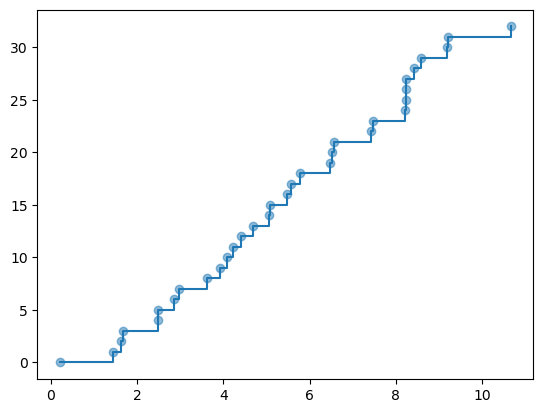

In [8]:
plot_Poisson(l,10)

We compute using the Monte-Carlo algorithm the quantity $\mathbb{E}[N_T]$

In [9]:
def ExpPoisson(lam,T):
    M=3000
    e=0
    # Write e the estimator of the expectation of N_T
    for i in range(M):
        tau = Jump_Times_Poisson(lam,T)
        e += len(tau)
    e = e/M #
    return e

In [10]:
print('Error=',ExpPoisson(2,10)-2*10)

Error= 0.9556666666666658


# Part II : Simulation and study of the claims

## 1) Small claims case

Half normal distribution

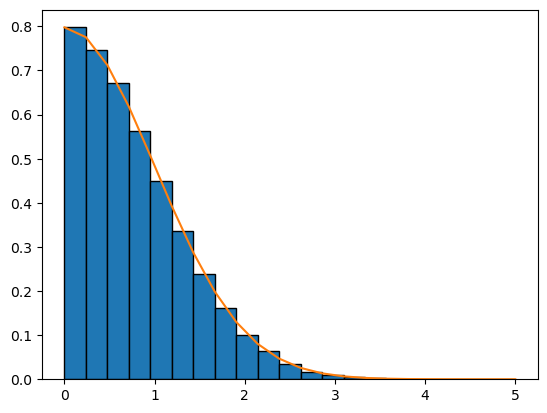

In [11]:
m=0
sig2=1
N=100000
G=st.halfnorm.rvs(m,np.sqrt(sig2),N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
    pb.append((np.sqrt(2)/np.sqrt(sig2*math.pi))*np.exp(-(tk)**2/(2*sig2)))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

Lognormal distribution

/tmp/ipykernel_4814/3212836077.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
/tmp/ipykernel_4814/3212836077.py:15: RuntimeWarning: divide by zero encountered in log
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
/tmp/ipykernel_4814/3212836077.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))


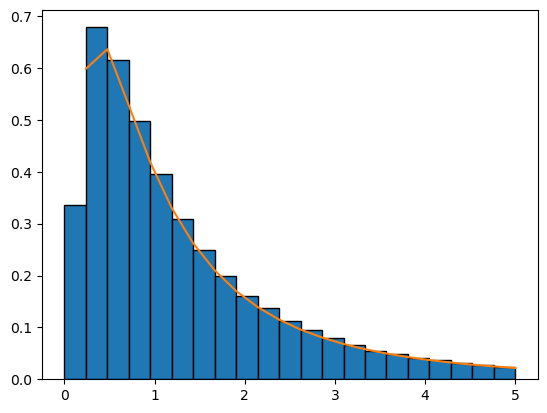

In [12]:
m=0
sig2=1
N=100000
G=np.random.lognormal(m,np.sqrt(sig2),N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
    pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

A Discrete Random variables taking two values

In [13]:
def TwoClaim(N):
    p=0.3
    G= np.random.binomial(1,p,N)
    X=[]
    for i in range (0,len(G)):
        if G[i]==0:
            X.append(1)
        else:
            X.append(5)
    return X

## 2) Large claims case

Weibull distribution

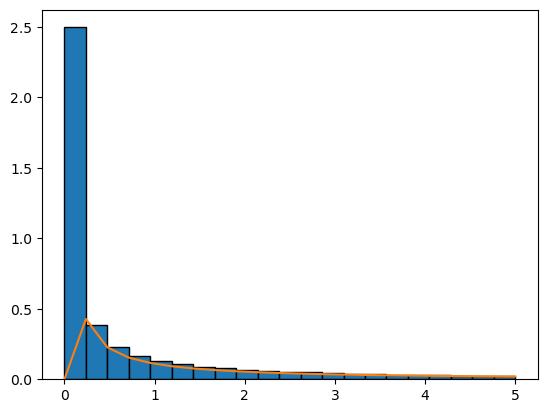

In [14]:
# Coefficient must satisfy : 0 < k < 1 and lambda=1
k=0.3
N=100000
G=np.random.weibull(k,N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5

for l in range(0,2*(n+1)):
    tk=mi+l*(ma-mi)/(2*n+1)
    c.append(tk)
    if tk==0:
        pb.append(0)
    else:
        pb.append(k*(tk)**(k-1)*np.exp(-(tk)**k))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

Pareto distribution

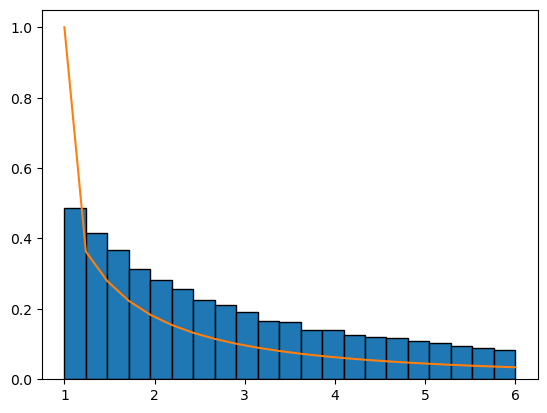

In [15]:
# Here location coefficient is assumed to be 1
k=0.5
N=100000
G=np.random.pareto(k,N)

n=10
pb=[]
c=[]
mi=1
ma=mi+5

for l in range(0,2*(n+1)):
    tk=mi+l*(ma-mi)/(2*n+1)
    c.append(tk)
    if tk==1:
        pb.append(1)
    else:
        pb.append(k/(tk**(k+1)))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

# Part III : Simulation of the risk process

## 1) Simulation 

#### A plot function

In [16]:
# A plot function (p is a two dimensional array of points on a grid and their value)
def plot_Process(p):
        
    tk=[i[0] for i in p] # We recover the times
    vk=[i[1] for i in p] # We recover the values of R
    
    v0=[0 for i in p]
    Ok=[tk,v0]
 
    plt.plot(tk,vk)
    plt.plot(tk,v0)
    plt.show()

#### Simulation of the claims

In [17]:
Np =100 # N is the number of points on [0,T]

In [18]:
def claim(a,N):
    # N is the number of claims
    # p = 0 : Log normal
    # p = 1 : Bernouilli
    # p = 2 : Weibull
    # p = 3 : Pareto
    # p = 4 : 1 (so that we just study the Poisson process)
    # p = 5 : Gaussian (in order to test the case of a continuous cdf)
    if a==0:
        return np.random.lognormal(0,1,N)
    elif a==1:
        return TwoClaim(N)
    elif a==2:
        return np.random.weibull(0.3,N)
    elif a==3: 
        return np.random.pareto(0.5,N)
    elif a==5:
        return np.random.normal(0,1,N)
    else:
        return np.ones(N)

#### Simulation of the value $N_t$ given the jump times J (as simulated in "Jump_Times_Poisson")

In [19]:
def N(t,Te,J):
    K=[]
    n=len(J)
    for j in range(0,n):
        K.append(J[j])
    if t==Te:
        return n-1
    K.append(Te)
    for i in range(0,n):
        if t >=K[i] and t <K[i+1]:
            return i

#### Simulation of the C process (given the jump times J and the claims Cl)

$$ C_t = \sum_{i=1}^{N_t} X_i, \; t \geq 0$$

In [20]:
def C(t,Te,J,Cl):
    K=[]
    D=[]
    n=len(J)
    
    for j in range(0,n):
        K.append(J[j])
        D.append(Cl[j])
    
    n=N(t,Te,K)
    r=0
    for i in range(0,n+1):
        r=r+D[i]
    return r

#### Simulation of the Risk process (returns the discretization of the path)

$$ R_t = u + pt -C_t; \quad C_t = \sum_{i=1}^{N_t} X_i, \; t \geq 0.$$

In [21]:
def Rprocess(u,p,a,Te,lam):
    
    #Discretization grid without the jump times
    Np=100 # Number of time discretization
    tk=[]
    for i in range(0,Np+1):
        tk.append(i*Te/Np)
    
    J=Jump_Times_Poisson(lam,Te) # We generate the jump times of the Poisson process
    
    temp=claim(a,len(J))
    Cl=[0]
    for k in range(0,len(J)):
        Cl.append(temp[k])
    
    for t in J:
        if t!=0:
            tk.append(t)
    
    tk.sort()
    
    pk=[]
    
    K=[]
    for t in J:
        K.append(t)
        
    L=[]
    for f in Cl:
        L.append(f)
    
    for t in tk:
        pk.append([t,u+p*t-C(t,Te,K,L)])
        
    return(pk)

Recall the Net Profit Condition : $\rho:=\frac{\lambda \mathbb{E}[X_1]}{p} < 1$.
This condition is necessary for $\theta(u)>0$ for some $u$ where :
$$ \varphi(u):=\mathbb{P}[\tau(u)=+\infty], \quad \tau(u):=\inf\{t>0, \; R_t<0\}; $$
$$ R_t = u + pt -C_t; \quad C_t = \sum_{i=1}^{N_t} X_i.$$
$\varphi(u)$ is the survival probability given $u$.

In [22]:
def Ruin(u,p,a,Te,lam):
    pk=Rprocess(u,p,a,Te,lam)
    tk=[i[0] for i in pk] # We recover the times
    
    plot_Process(pk)
    
    t=0 # Ruin time (if 0 then no ruin, else is the ruin time)
    
    for temp in pk:
        if temp[1]<0:
            t=temp[0]
            return t
    return t

In [23]:
t=Ruin(10,3,1,10,2)
if t==0:
    print('No ruin')
else:
    print('The ruin time is : ',t)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

Recall that for any jump time $\tau_k$ of the Poisson process 
$$R_{\tau_k} = u + p \tau_k -\sum_{i=1}^k X_i = u + \sum_{i=1}^k Y_i,$$
with $Y_i := p W_i - X_i$ and $W_i:=\tau_i -\tau_{i-1}$.
We set 
$$ \kappa:=\inf\{k\geq 1, \; R_{\tau_k} <0\}. $$

## 2) Cramér-Lundberg coefficient and ruin analysis

#### The small claims case

Study the condition studied during the lectures for insuring no ruin

The coefficent rho= 0.6594885082800512
NPC is in force


/var/folders/cy/ql3mr0_547nbng6blc9pp0h9ltycfl/T/ipykernel_26964/3131313151.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tau.append(float(e))


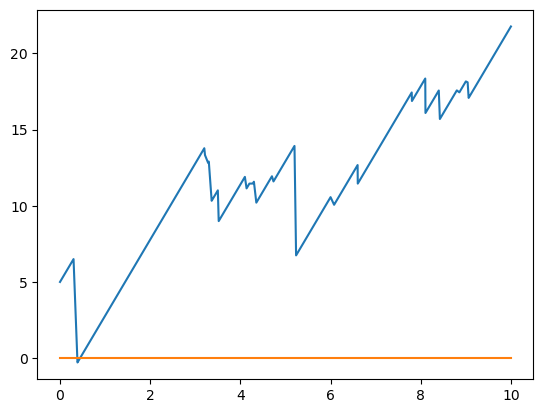

The ruin time is :  0.38717959336616065


In [23]:
#We study the lognormal case 
# \mu = E[X_1] = exp(1/2) as we considered the lognormal with mean 0 and variance 1
mu=np.exp(0.5)
lam=2
u=5
c=5
rho=(lam*mu)/c
print('The coefficent rho=',rho)
if rho<1:
    print('NPC is in force')
else:
    print('NPC fails')
t=Ruin(u,c,0,10,lam)

if t==0:
    print('No ruin')
else:
    print('The ruin time is : ',t)

#### The large claims case

Study the condition studied during the lectures for insuring no ruin

Recall that if $\tau_k$ denotes a jump time of the Poisson process $N$ that 
$$ R_{\tau_k} = u + p \tau_k - \sum_{i=1}^{k} X_i = u - \sum_{i=1}^{k} Y_i,$$
$Y_i:=X_i-p W_i$, with $W_i:=\tau_i-\tau_{i-1}$, $\tau_0:=0$.

## Ruin as a rare event

We now consider a new family of claims the so-called Gamma distribution 
A random variable $X \sim \Gamma(\alpha,\beta)$ if it admits as a density : 
$$ x \mapsto \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, \; x\geq 0, \quad \Gamma(\alpha):=\int_0^{+\infty} y^{\alpha-1} e^{-y} dy.$$
In Python the `np.random.gamma(alpha,theta)` with $\theta:=\beta^-1$ to simulate a sample of $\Gamma(\alpha,\beta)$.

We consider the CL model as above, with $N$ a Poisson process with paramater $\lambda$ refered as `lam` and with claims $X_i \sim \Gamma(\alpha,\beta)$.  

In [31]:
p=1; alpha=1; lam=0.5; beta=1; T =500; be=1/beta

In [32]:
def Y(p=1,alpha=2.5,beta=0.03,lam=0.005):
    return -p*np.random.exponential(1/lam)+np.random.gamma(alpha,1/beta)

In [1]:
# Create a function MCruin that gives an estimate of the ruin probability over [0,T] as a function of u and n the size of the MC sample
def MCruin(u,n):
    somme=0
    for i in range(n):
        # We simulate R_t for t <= T and see if there is ruin
        temp=0 
        r=u
        go=False # go is a boolean that is FALSE is there is no ruin
        while (temp <= T & go == False):
            temp+=np.random.exponential(lam) #temp is the inter-jump
            r+=p*temp-np.random.gamma(alpha,be)
            if r<0:
                go = True
                somme+=1 
    return somme/n
MCruin(30,10)

NameError: name 'T' is not defined

In [63]:
# Choose u so that MCruin(u,10000) is a rare event
MCruin(10,1000)

0.0

## Shifting the window of sampling
With our choice of random variables $Y$ admits a density $f_Y$. We set $\rho_Y$ the cumulant generating function associated to $Y$,
$$ \rho_Y(\theta):=\ln \int_{\mathbb{R}} \exp(\theta y) f_Y(y) dy.$$
We set $P_\theta$ the measure with respect to which $Y$ has density $\exp(\theta y-\rho(\theta)) f_Y(y)$. Prove that for any non-negative maps $(h_k)_{k\geq 1}$
$$ \mathbb{E}\left[\textbf{1}_{\kappa<+\infty}\prod_{k=1}^{\kappa} h_k(Y_k)\right] = \mathbb{E}_\theta\left[\textbf{1}_{\kappa<+\infty}\prod_{k=1}^{\kappa} h_k(Y_k) \left(\prod_{\ell=1}^{\kappa} \exp(-Y_\ell \theta+\rho(\theta)\right)\right], \quad (\ast) $$

Show that for any $\theta$ in the domain of $\rho_Y$, $\rho_Y'(0) = \mathbb{E}[Y]$ and $\rho_Y'(\theta) = \mathbb{E}_\theta[Y]$.
$$ \rho_Y'(\theta) = \frac{\int y \exp(y \theta) f_Y(y) dy}{\int \exp(y \theta) f_Y(y) dy} = \int y \exp(y \theta-\rho_Y(\theta)) f_Y(y) dy = E_\theta[Y].$$

Deduce that $\theta$ such that $\rho'(\theta) >0$
$$ P_\theta[\tau<+\infty]=1.$$
Recall that $\kappa = \inf\{k\geq 1, \; R_{\tau_{\kappa}}<0\} = \inf\{k\geq 1, \; \sum_{i=1}^k Y_i >u\}$ as 
$ R_{\tau_k} = u - \sum_{i=1}^k Y_i$. Hence
$$ P_\theta[\kappa=+\infty] = P_\theta[\forall k; \; \sum_{i=1}^k Y_i < u] $$

Deduce that for $\theta$ such that $\rho_Y'(\theta)>0$
$$ P[\kappa<+\infty] = \mathbb{E}_\theta\left[\exp\left(\rho_Y(\theta) \tau -\theta\sum_{\ell=1}^{\kappa} Y_\ell\right)\right], \quad (**).$$

Indeed take $h_k \equiv 1$ in $(\ast)$ to get that
$$ P[\kappa<+\infty] = \mathbb{E}_\theta\left[\textbf{1}_{\kappa<+\infty}\left(\prod_{\ell=1}^{\kappa} \exp(-Y_\ell \theta+\rho(\theta)\right)\right] = \mathbb{E}_\theta\left[\exp\left(\rho_Y(\theta)\kappa -\theta\sum_{\ell=1}^{\kappa} Y_\ell\right)\right]$$

Let $Z$ a random variable with intensity $\exp(\theta z-\rho_Y(\theta)) f_Y(z)$ and let $\tilde{\rho}$ its cumulant generating function. Prove that 
$$ \tilde{\rho}(a) = \rho_Y(a+\theta)-\rho_Y(a).$$

$$ \tilde{\rho}(a) = \ln \int_{\mathbb R} \exp(a x) \exp(\theta x -\rho_Y(\theta)) f_Y(a) da = \ln \left(\exp(-\rho_Y(\theta)) \int_{\mathbb R} \exp((a+\theta) x) f_Y(a) da\right) = \rho_Y(a+\theta)-\rho_Y(\theta).$$

Prove that for $Z \sim \Gamma(\alpha,\beta)$
$$ \rho_Z(\theta) = -\alpha \ln\left(1-\frac{\theta}{\beta}\right), \; \theta \in (-\infty,\beta).$$

\begin{align*}
\rho_Z(\theta) &= \ln \int \exp(\theta y) \frac{\beta^\alpha}{\Gamma(\alpha)} y^{\alpha-1} e^{-\beta y} dy\\
&= \ln \frac{\beta^\alpha}{\Gamma(\alpha)} + \ln \int y^{\alpha-1} e^{(\theta-\beta) y} dy \\
&= \ln \frac{\beta^\alpha}{\Gamma(\alpha)} + \ln (\beta-\theta)^{-\alpha} + \ln \int z^{\alpha-1} e^{-z} dz, \; z = - (\theta-\beta) y \\
&= \ln \frac{\beta^\alpha}{\Gamma(\alpha)} + \ln (\beta-\theta)^{-\alpha} + \ln \Gamma(\alpha) \\
&= \ln \beta^\alpha + \ln (\beta-\theta)^{-\alpha}\\
&= \alpha \ln \left(\frac{\beta}{\beta-\theta}\right)\\
&= -\alpha \ln \left(\frac{\beta-\theta}{\beta}\right)\\
&= -\alpha \ln \left(1-\frac{\theta}{\beta}\right).
\end{align*}

Prove that for $Z \sim \mathcal{E}(\lambda)$, 
$$ \rho_Z(\theta) = -\ln\left(1-\frac{\theta}{\lambda}\right), \; \theta \in (-\infty,\lambda).$$

\begin{align*}
\rho_Z(\theta) &= \ln \lambda + \ln \int \exp(\theta y) \exp(-\lambda y) dy\\
&= \ln \lambda + \ln \int \exp((\theta-\lambda) y)dy\\
&= \ln \lambda - \ln (\lambda-\theta) + \ln \int \exp(-z)dz, \; z = -(\theta-\lambda) y\\
&= \ln \frac{\lambda}{\lambda-\theta}\\
&= -\ln \frac{\lambda-\theta}{\lambda}\\
&= -\ln \left(1-\frac{\theta}{\lambda}\right).
\end{align*}

Prove that for $Y = X - p W$ (with $X$ and $W$ independent) 
$$\rho_Y(\theta) = -\alpha \ln\left(1-\frac{\theta}{\beta}\right) - \ln\left(1+\frac{\theta p}{\lambda}\right).$$

\begin{align*}
\rho_Y(\theta) &= \ln \int \exp(\theta y) (f_\Gamma \ast f_{-p\mathcal E})(y) dy \\
&= \ln \int \exp(\theta y) \int \textbf{1}_{y-z \geq 0} f_\Gamma(y-z) \textbf{1}_{z\leq 0} f_{-p\mathcal E}(z) dz dy \\
&= \ln \int \exp(\theta (y-z)) \int \textbf{1}_{y-z \geq 0} \exp(\theta z) f_\Gamma(y-z) \textbf{1}_{z\leq 0} f_{-p\mathcal E}(z) dz dy \\
&= \ln \int \textbf{1}_{z\leq 0} f_{-p\mathcal E}(z) \exp(\theta z) \int \exp(\theta (y-z)) \textbf{1}_{y-z \geq 0} f_\Gamma(y-z)  dy dz \\
&= -\alpha \ln\left(1-\frac{\theta}{\beta}\right) +\ln \int \textbf{1}_{z\leq 0} f_{-p\mathcal E}(z) \exp(\theta z) dz \\
&= -\alpha \ln\left(1-\frac{\theta}{\beta}\right) - \ln\left(1+\frac{\theta p}{\lambda}\right).
\end{align*}

$c<d<0$,
$$P[-E \in [c,d]] = P[E \in [-d,-c]] = \lambda \int_{-d}^{-c} e^{-\lambda x} dx = \lambda \int_{c}^{d} e^{\lambda y} dy.$$
Donc $f_{-\mathcal E}(x) = \textbf{1}_{x\leq 0} \lambda \exp(\lambda x)$.

Deduce that the cumulant generating function of $Y$ under $P_\theta$ is 
$$ \tilde{\rho}(a)= -\alpha \ln\left(1-\frac{a}{\beta-\theta}\right)-\ln\left(1+\frac{a p}{\lambda+\theta p}\right).$$

\begin{align*}
\tilde{\rho}(a) &= \rho_Y(a+\theta)-\rho_Y(\theta) \\
&=-\alpha \ln\left(1-\frac{a+\theta}{\beta}\right) - \ln\left(1+\frac{(a+\theta) p}{\lambda}\right) - \left(-\alpha \ln\left(1-\frac{\theta}{\beta}\right) - \ln\left(1+\frac{\theta p}{\lambda}\right)\right)\\
&=-\alpha \left[ \ln\left(\frac{\beta-a-\theta}{\beta}\right) - \ln\left(\frac{\beta-\theta}{\beta}\right) \right]-\left[\ln\left(\frac{\lambda+(a+\theta) p}{\lambda}\right) - \ln\left(\frac{\lambda+\theta p}{\lambda}\right)\right]\\
&=-\alpha \ln\left(\frac{\beta-a-\theta}{\beta-\theta}\right)-\ln\left(\frac{\lambda+(a+\theta) p}{\lambda+\theta p}\right) \\
&=-\alpha \ln\left(1-\frac{a}{\beta-\theta}\right)-\ln\left(1+\frac{a p}{\lambda+\theta p}\right) \\
\end{align*}

Hence, under $P_\theta$, $Y$ has the same law than $\tilde X - p\tilde W$ with $\tilde X \sim \Gamma(\alpha,\beta-\theta)$ and $W \sim \mathcal{E}(\lambda +p\theta)$ with $\tilde X$ and $\tilde W$ independent. 

## Optimal choice of parameter $\theta$

One can show that $\rho_Y$ is a convex mapping and that if $\rho_Y'(0)<0$ (that is $E[Y]<0$) then there exists a unique $\theta^* \in (0,\beta)$ such that $\rho_Y(\theta^*)=0$. This value can be proved to be optimal for the importance sampling method.

## Monte-Carlo importance sampling of the ruin probabiliy

In [64]:
# Create the function MCIS(u,n,\theta) that implements the ruin probability using Expression (**)
def rho(alpha,beta,lam,theta):
    return -alpha*np.log(1-theta/beta)+np.log(1+theta*p/lam)

def MCIS(u,n,theta,p=1, alpha=1, lam=0.5, beta=1, T =500):
    somme=0
    for i in range(n):
        kap=0
        go=False
        S=0 #S is the sum of claims S =\sum Y_i
        while (go==False):
            S+=np.random.gamma(alpha,1/(beta-theta)) - p*np.random.exponential(1/(lam+p*theta))
            if S > u:
                go = True
                kap+=1
                somme+=np.exp(-theta*S+rho(alpha,beta,lam,theta)*kap)
    return somme/n

MCIS(10,100,0.9)

0.00035353382792986036

In [ ]:
# Plot the mapping \theta -> \rho_Y(\theta)

# Part IV : Risk measures

We are going to use Monte-Carlo simulation; in what follows $M$ denotes the number of simulations in M-C. Recall that the precision of the approximation $10^{-p}$ requires $M$ to be of order $M=10^{2p}$.

In [24]:
M=100000

## 1) V@R

Write a function that computes the V@R of a Risk process

In [25]:
def SimulR_T(u,p,a,Te,lam):
    P=np.random.poisson(lam*Te,1) # We simulate the number of claims N_T
    Cl=claim(a,P)
    return u+p*Te-sum(Cl)

In [26]:
def VaR(alpha,u,p,a,Te,lam):
    # alpha is so that we compute V@R_\alpha
    X=[]
    for i in range(0,M):
        X.append(SimulR_T(u,p,a,Te,lam))
    return -np.quantile(X,alpha,interpolation='higher')

In [27]:
alpha=0.1
u=1
p=2
Te=3
lam=2
print('Alpha=',alpha,'Var at level alpha=',VaR(alpha,u,p,4,Te,lam))

Alpha= 0.1 Var at level alpha= 2.0


## 2) Beyond V@R

According to the lecture study other risk measures and compare them with V@R

Here one can simulate all the risk measures studied in the Lecture Notes pages 12 and 13 and especially check the inequalities presented in Proposition 3.12

In [28]:
def mplus(x):
    if x >= 0: 
        return x
    else: 
        return 0

def AVaR(alpha,u,p,a,Te,lam):    
    X=[]
    Z=[]
    
    for i in range(0,M):
        X.append(SimulR_T(u,p,a,Te,lam))
        Z.append(SimulR_T(u,p,a,Te,lam))
        
    v=np.quantile(X,alpha,interpolation='higher')
    
    r=0
    for i in range(1,M):
        r=r+mplus(v-Z[i])
    r=(r/(alpha*M))-v
    
    return r

In [29]:
def LeL(alpha,u,p,a,Te,lam):
    
    X=[]
    Z=[]
    for i in range(0,M):
        X.append(SimulR_T(u,p,a,Te,lam))
        Z.append(SimulR_T(u,p,a,Te,lam))
        
    v=-np.quantile(X,alpha,interpolation='higher')
    n=0
    Y=0
    for k in range(0,M):
        if -Z[k]>=v:
            n=n+1
            Y=Y-Z[k]   
    Y=Y/n
    return Y 

In [30]:
alpha=0.1
u=1
p=1
Te=1
lam=0.5
a=3
r1=AVaR(alpha,u,p,a,Te,lam)
r2=LeL(alpha,u,p,a,Te,lam)
r3=VaR(alpha,u,p,a,Te,lam)
print('Alpha=',alpha)
print('Avar at level alpha=',r1)
print('LeL at level alpha=',r2)
print('Var at level alpha=',r3) 

Alpha= 0.1
Avar at level alpha= 101527.46813378428
LeL at level alpha= 55870.4189519894
Var at level alpha= 21.554341988252425


Remark : we should have that : 
AVaR >= LeL >= VaR 
but you see that for large claims (Pareto and Weibull) the simulation is very unstable. This means that the computation of the quantile and the Monte-Carlo simulations would require much more simulations. 
One can check already that for these laws the computation of VaR is unstable.
One see has well that the quantities LeL and AVaR do not coincide which is usually knwon to be true for random variables with continuous CDF which is not the case for $R_T$ and it is usually wrong already for the Poisson law $N_T$ as shown below (this corresponds to the claims $X_i=1$).

In [31]:
# Take X_i=1 and u=p=0 so that S_T=-N_T and check that VaR does not agree with LeL
alpha=0.1
u=0
p=0
Te=2
lam=0.5
r1=AVaR(alpha,u,p,4,Te,lam)
r2=LeL(alpha,u,p,4,Te,lam)
r3=VaR(alpha,u,p,4,Te,lam)
print('Alpha=',alpha)
print('Avar at level alpha=',r1)
print('LeL at level alpha=',r2)
print('Var at level alpha=',r3) 

Alpha= 0.1
Avar at level alpha= 3.037
LeL at level alpha= 2.39046103723908
Var at level alpha= 2.0
